In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

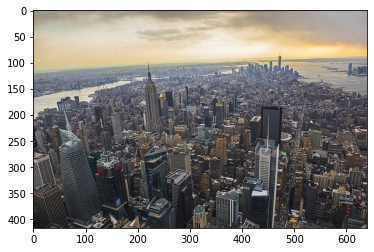

In [42]:
im = cv2.imread("image.jpg")[:, :, ::-1]
plt.imshow(im)
plt.show()

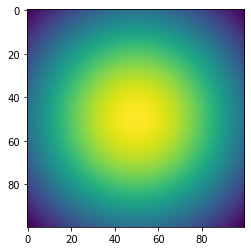

In [43]:
def gaussian(x, y, sigma):
  return np.exp(-(x**2 + y**2)/(2 * sigma**2))/2 * np.pi * (sigma**2)

plt.imshow(np.array(
    [
     [gaussian(x_, y_, 1) for y_ in np.linspace(-1, 1, 100)] 
     for x_ in np.linspace(-1, 1, 100)
     ]))
plt.show()

In [44]:
def apply_filter(im, filt):
    filt_height, filt_width = filt.shape
    filt = filt.reshape((filt.shape[0], filt.shape[1], 1))
    im = cv2.copyMakeBorder(
        im, top=filt_height//2, bottom=filt_height//2, left=filt_width//2, right=filt_width//2,
        borderType=cv2.BORDER_CONSTANT,
        value=[0, 0, 0]
        )
    result = im.copy()
    for i in range(filt_height//2, im.shape[0] - filt_height//2):
        for j in range(filt_width//2, im.shape[1] - filt_width//2):
            result[i, j] = (im[
                              i - filt_height//2 : i - filt_height//2 + filt_height,
                              j - filt_width//2 : j - filt_width//2 + filt_width
                              ]*filt).sum(axis=0).sum(axis=0)
    return result[filt_height//2:-filt_height//2, filt_width//2:-filt_width//2]

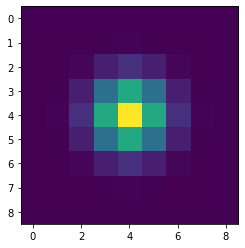

In [45]:
def make_gaussian_filter(sigma):
  k_size = 2 * int(4 * sigma + 0.5) + 1
  sum = 0
  gaussian_kernel = np.zeros((k_size, k_size), np.float32)
  for x in range(-k_size//2, k_size//2 + 1):
        for y in range(-k_size//2, k_size//2 + 1):
            val = gaussian(x, y, sigma)
            gaussian_kernel[x + k_size//2, y + k_size//2] = val
            sum += val
  
  return gaussian_kernel/sum

plt.imshow(make_gaussian_filter(1))
plt.show()

In [47]:
im1 = apply_filter(im, make_gaussian_filter(1))
im2 = apply_filter(im, make_gaussian_filter(2))
im5 = apply_filter(im, make_gaussian_filter(5))
im10 = apply_filter(im, make_gaussian_filter(10))

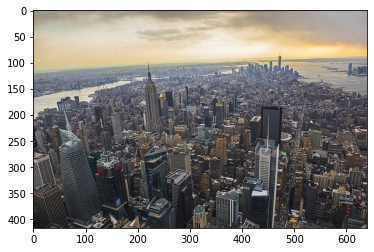

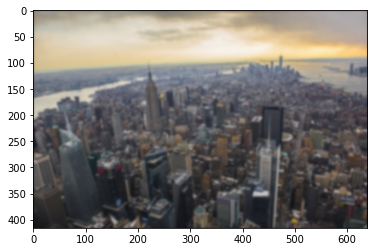

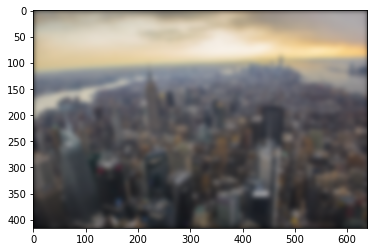

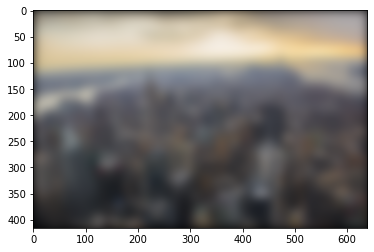

In [49]:
plt.imshow(im)
plt.show()

plt.imshow(im2)
plt.show()

plt.imshow(im5)
plt.show()

plt.imshow(im10)
plt.show()

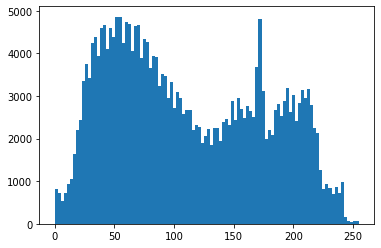

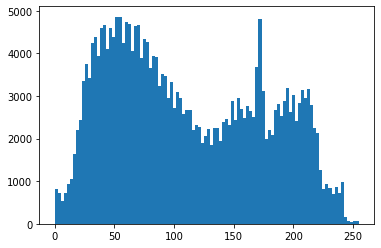

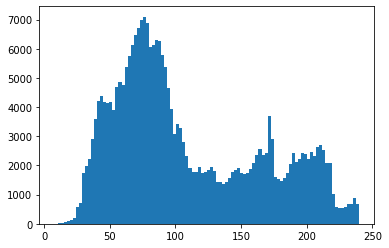

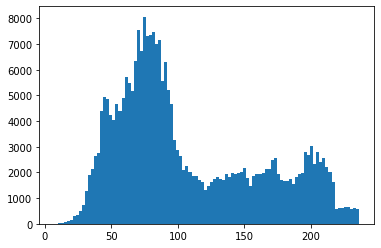

In [55]:
plt.hist(im.mean(axis=2).reshape(-1), bins=100)
plt.show()

plt.hist(im.mean(axis=2).reshape(-1), bins=100)
plt.show()

plt.hist(im5.mean(axis=2).reshape(-1), bins=100)
plt.show()

plt.hist(im10.mean(axis=2).reshape(-1), bins=100)
plt.show()